In [1]:
# Python berperforma tinggi dan penulisan code data science secara clean dan effective

In [25]:
# Import library yang diperlukan

import pyarrow # Library untuk python berperforma tinggi berbasis data science
import modin.pandas as mpd # kalau ingin performa tinggi berbasis big data
from tabulate import tabulate as tabular # ingin menampilkan tabel apache spark agar cepat, efisien, dan performa tinggi
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
import scipy.stats as stats
from scipy.stats import chi2, zscore
from scipy.stats import shapiro, kstest, norm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg
import tensorflow as tfdty
from tensorflow import keras
from tensorflow.keras import regularizers
import keras_tuner as kt
import lime
import lime.lime_tabular
%matplotlib inline 
# agar plotting cepat

STATISTIKA KLASIK

In [26]:
# Ambil data yang diperlukan

df =  pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\iris.csv", 
                  dtype_backend = 'pyarrow') # ubah backend ke mesin apache arrow agar performa pandas tinggi
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [10]:
# Ambil data yang diperlukan

mdf =  mpd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\wine.csv", # menggunakan modin untuk data besar
                   dtype_backend = 'pyarrow') # bisa digabung dengan enginee apache arrow agar bisa scalable lebih
mdf.head(6)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,1
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [23]:
# Agar menampilkan tabel secara efisien agar performa tinggi

print(tabular(mdf[['Ash','Alcohol']].head(10), headers="keys", tablefmt="psql",showindex=True))

# batasi kolom karena masih acak-acak(library ini belum sempurna)

+----+-------+-----------+
|    |   Ash |   Alcohol |
|----+-------+-----------|
|  0 |  2.43 |     14.23 |
|  1 |  2.14 |     13.2  |
|  2 |  2.67 |     13.16 |
|  3 |  2.5  |     14.37 |
|  4 |  2.87 |     13.24 |
|  5 |  2.45 |     14.2  |
|  6 |  2.45 |     14.39 |
|  7 |  2.61 |     14.06 |
|  8 |  2.17 |     14.83 |
|  9 |  2.27 |     13.86 |
+----+-------+-----------+


In [11]:
# cek

mdf.info()

# memakai pandas berbasis modin untuk skala big data, dan menggunakan engine apache arrow agar berperforma tinggi

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Alcohol               178 non-null    double[pyarrow]
 1   Malic_Acid            178 non-null    double[pyarrow]
 2   Ash                   178 non-null    double[pyarrow]
 3   Ash_Alcanity          178 non-null    double[pyarrow]
 4   Magnesium             178 non-null    int64[pyarrow] 
 5   Total_Phenols         178 non-null    double[pyarrow]
 6   Flavanoids            178 non-null    double[pyarrow]
 7   Nonflavanoid_Phenols  178 non-null    double[pyarrow]
 8   Proanthocyanins       178 non-null    double[pyarrow]
 9   Color_Intensity       178 non-null    double[pyarrow]
 10  Hue                   178 non-null    double[pyarrow]
 11  OD280                 178 non-null    double[pyarrow]
 12  Proline               178 non-null    int64[pyarrow] 
 13  

In [27]:
# Cek datanya

df.info()

# terlihat data typesnya memakai apache arrow engine, sangat efisien dan performa tinggi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   sepal_length  150 non-null    double[pyarrow]
 1   sepal_width   150 non-null    double[pyarrow]
 2   petal_length  150 non-null    double[pyarrow]
 3   petal_width   150 non-null    double[pyarrow]
 4   species       150 non-null    string[pyarrow]
dtypes: double[pyarrow](4), string[pyarrow](1)
memory usage: 6.6 KB


In [28]:
# Cek apakah ada missing values, dan duplikat

print(df.isna().value_counts())
print("====================================================")
print(df.isnull().value_counts())
print("====================================================")
print(df.duplicated().value_counts())

sepal_length  sepal_width  petal_length  petal_width  species
False         False        False         False        False      150
Name: count, dtype: int64
sepal_length  sepal_width  petal_length  petal_width  species
False         False        False         False        False      150
Name: count, dtype: int64
False    147
True       3
Name: count, dtype: int64


In [29]:
# Terlihat ada 3 data duplikat, kita drop saja
df = df.drop_duplicates()

print(df.duplicated().value_counts())

False    147
Name: count, dtype: int64


In [30]:
# Ambil kolom numerik saja

kolom_numerik = df[['sepal_length','sepal_width','petal_length','petal_width']]
print(kolom_numerik)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[147 rows x 4 columns]


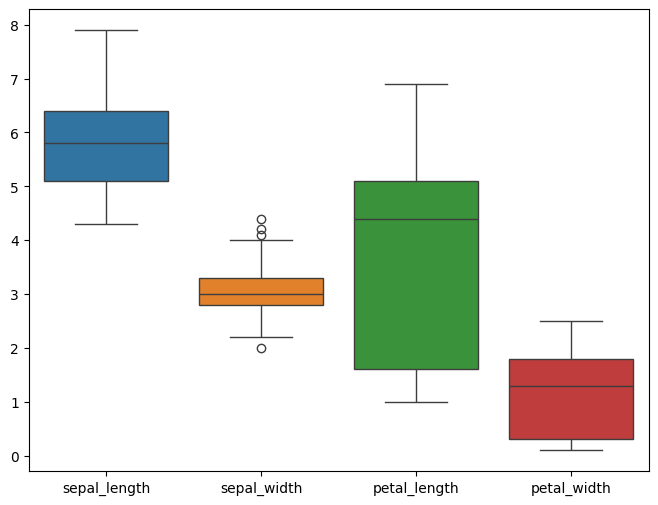

In [31]:
# Cek outlier

plt.figure(figsize=(8,6))
sns.boxplot(data=kolom_numerik)
plt.show()

In [8]:
# Cek kenormalan datanya dulu univariat metode Shapiro-Walk(sampel kecil-menengah)

for col in kolom_numerik:
    data = df[col]
    stat, p = shapiro(data)
    print(f"\nKolom: {col}")
    print("Statistik:", stat)
    print("p-value:", p)

    if p > 0.05:
        print("Data berdistribusi normal")
    else:
        print("Data tidak berdistribusi normal")

# Terlihat hanya kolom sepal width yang berdistribusi normal


Kolom: sepal_length
Statistik: 0.977571427822113
p-value: 0.01645657978951931
Data tidak berdistribusi normal

Kolom: sepal_width
Statistik: 0.9841548204421997
p-value: 0.08911208063364029
Data berdistribusi normal

Kolom: petal_length
Statistik: 0.8787171840667725
p-value: 1.2971334006905977e-09
Data tidak berdistribusi normal

Kolom: petal_width
Statistik: 0.903998613357544
p-value: 2.881322913594886e-08
Data tidak berdistribusi normal


In [9]:
# Cek kenormalan datanya dulu univariat metode Kolmogorov-Smirnov(sampel menengah-besar)

for col in kolom_numerik:
    data = df[col]
    data_std = (data - data.mean()) / data.std()
    stat, p = kstest(data_std, 'norm')
    print(f"\nKolom: {col}")
    print("Statistik:", stat)
    print("p-value:", p)

    if p > 0.05:
        print("Data berdistribusi normal")
    else:
        print("Data tidak berdistribusi normal")

# Terlihat ketika memakai metode KS hanya kolom sepal width dan sepal length yang berdistribusi normal


Kolom: sepal_length
Statistik: 0.08452444830794204
p-value: 0.2309883528441381
Data berdistribusi normal

Kolom: sepal_width
Statistik: 0.10860847521885247
p-value: 0.05776795033485527
Data berdistribusi normal

Kolom: petal_length
Statistik: 0.19443540350863803
p-value: 2.4161129522254204e-05
Data tidak berdistribusi normal

Kolom: petal_width
Statistik: 0.16999637280092206
p-value: 0.0003492480198301101
Data tidak berdistribusi normal


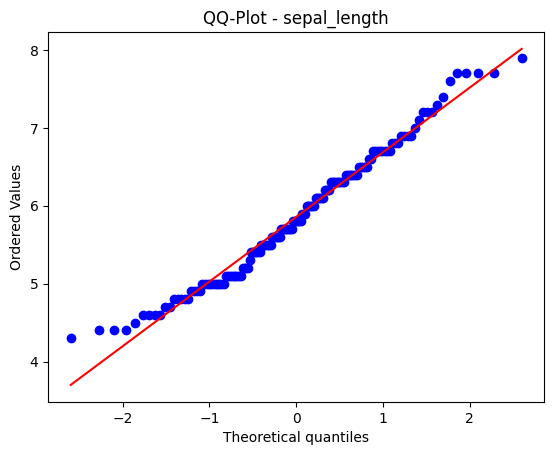

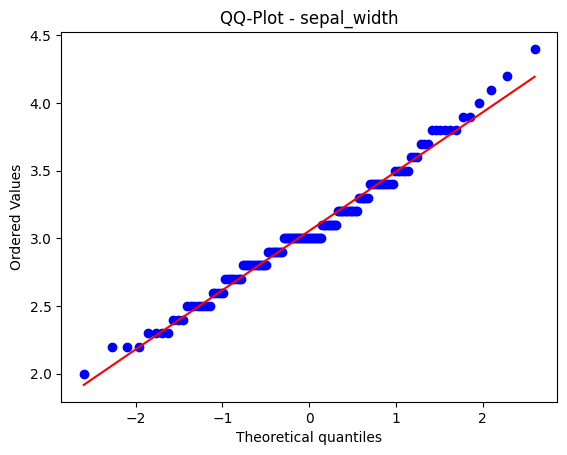

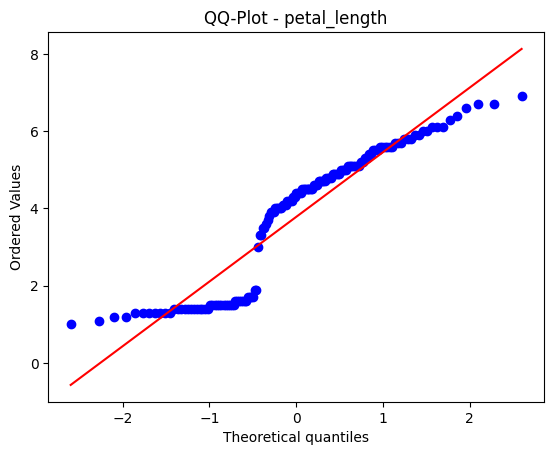

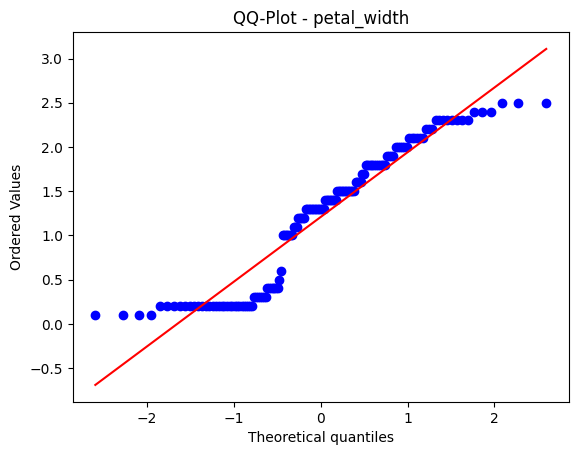

In [10]:
# Cek outlier QQ-Plot univariat

for col in kolom_numerik:
    plt.figure()
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.title(f"QQ-Plot - {col}")
    plt.show()

# Terlihat pola sangat acak di variabel petal length dan width

In [26]:
# Cek kenormalan secara multivariat dengan Mardia

Mardia = pg.multivariate_normality(kolom_numerik, alpha=0.05)
print(Mardia)

if Mardia.pval > 0.05:
    print("Data normal secara multivariat")
else:
    print("Data tidak normal secara multivariat")

HZResults(hz=2.278364486275099, pval=3.196302821215516e-18, normal=False)
Data tidak normal secara multivariat


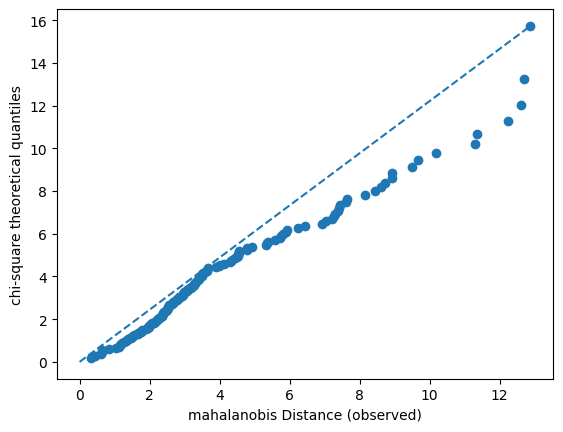

In [38]:
# Cek QQ Plot secara multivariat dengan chi-square

mean = kolom_numerik.mean()
kovarian = np.cov(kolom_numerik.T)
inv_kovarian = np.linalg.inv(kovarian)

md = []
for i in range(len(kolom_numerik)):
    x = kolom_numerik.iloc[i] - mean
    md.append(np.sqrt(x.T @ inv_kovarian @ x))

md = np.array(md)
chi2_q = chi2.ppf((np.arange(1, len(md) + 1) - 0.5) / len(md), df=kolom_numerik.shape[1])

plt.scatter(np.sort(md**2), chi2_q)
plt.plot([0, max(md**2)], [0, max(chi2_q)], '--')
plt.xlabel('mahalanobis Distance (observed)')
plt.ylabel('chi-square theoretical quantiles')
plt.show()

# Terlihat acak, tidak normal

In [39]:
# Drop outlier secara multivariat

mean = kolom_numerik.mean()
kovarian = np.cov(kolom_numerik.T)
inv_kovarian = np.linalg.inv(kovarian)

md = []
for i in range(len(kolom_numerik)):
    x = kolom_numerik.iloc[i] - mean
    md.append(np.sqrt(x.T @ inv_kovarian @ x))

df['MD'] = md

# Treshold alpha 0.001
treshold = np.sqrt(chi2.ppf(0.999, df=kolom_numerik.shape[1]))
print('Treshold:', treshold)

# Hapus outlier multivariat
df_no_outlier = df[df['MD'] <= treshold]
print(df_no_outlier)

Treshold: 4.297304614860711
     sepal_length  sepal_width  petal_length  petal_width    species        MD
0             5.1          3.5           1.4          0.2     setosa  1.478341
1             4.9          3.0           1.4          0.2     setosa  1.691935
2             4.7          3.2           1.3          0.2     setosa  1.457290
3             4.6          3.1           1.5          0.2     setosa  1.582545
4             5.0          3.6           1.4          0.2     setosa  1.588790
..            ...          ...           ...          ...        ...       ...
145           6.7          3.0           5.2          2.3  virginica  2.989312
146           6.3          2.5           5.0          1.9  virginica  1.999361
147           6.5          3.0           5.2          2.0  virginica  1.318937
148           6.2          3.4           5.4          2.3  virginica  2.763428
149           5.9          3.0           5.1          1.8  virginica  1.868009

[147 rows x 6 columns]


In [41]:
# Drop outlier secara univariat
df_clean = df.copy()

for col in kolom_numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df_clean

,sepal_length,sepal_width,petal_length,petal_width,species,MD
0,5.1,3.5,1.4,0.2,setosa,1.478341
1,4.9,3.0,1.4,0.2,setosa,1.691935
2,4.7,3.2,1.3,0.2,setosa,1.457290
3,4.6,3.1,1.5,0.2,setosa,1.582545
4,5.0,3.6,1.4,0.2,setosa,1.588790
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.989312
146,6.3,2.5,5.0,1.9,virginica,1.999361
147,6.5,3.0,5.2,2.0,virginica,1.318937
148,6.2,3.4,5.4,2.3,virginica,2.763428


In [44]:
# Drop outlier metode z-score univariat

df_bersih = df.copy()

for col in kolom_numerik:
    df_bersih[col + "_z"] = zscore(df_bersih[col])
    df_bersih = df_bersih.drop(columns = [c for c in df_bersih.columns if c.endswith("_z")])

df_bersih

,sepal_length,sepal_width,petal_length,petal_width,species,MD
0,5.1,3.5,1.4,0.2,setosa,1.478341
1,4.9,3.0,1.4,0.2,setosa,1.691935
2,4.7,3.2,1.3,0.2,setosa,1.457290
3,4.6,3.1,1.5,0.2,setosa,1.582545
4,5.0,3.6,1.4,0.2,setosa,1.588790
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.989312
146,6.3,2.5,5.0,1.9,virginica,1.999361
147,6.5,3.0,5.2,2.0,virginica,1.318937
148,6.2,3.4,5.4,2.3,virginica,2.763428


In [45]:
# drop outlier secara resmi

for col in kolom_numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df

,sepal_length,sepal_width,petal_length,petal_width,species,MD
0,5.1,3.5,1.4,0.2,setosa,1.478341
1,4.9,3.0,1.4,0.2,setosa,1.691935
2,4.7,3.2,1.3,0.2,setosa,1.457290
3,4.6,3.1,1.5,0.2,setosa,1.582545
4,5.0,3.6,1.4,0.2,setosa,1.588790
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.989312
146,6.3,2.5,5.0,1.9,virginica,1.999361
147,6.5,3.0,5.2,2.0,virginica,1.318937
148,6.2,3.4,5.4,2.3,virginica,2.763428


In [48]:
# drop kelas setosa dan kolom MD untuk fitting logistik statsmodels

kelas_drop = 'setosa'
df = df[df['species'] != kelas_drop ]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [49]:
# Pisahkan variabel untuk fitting logistic

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

In [50]:
# Tambahkan konstan

X_constant = sm.add_constant(X)

In [53]:
# Ubah y jadi numerik

le =  LabelEncoder()
y_num = le.fit_transform(y)

print(y_num)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [55]:
# fitting model logistiknya

model = sm.Logit(y_num, X_constant).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.060703
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   98
Model:                          Logit   Df Residuals:                       93
Method:                           MLE   Df Model:                            4
Date:                Fri, 21 Nov 2025   Pseudo R-squ.:                  0.9124
Time:                        09:21:01   Log-Likelihood:                -5.9489
converged:                       True   LL-Null:                       -67.928
Covariance Type:            nonrobust   LLR p-value:                 7.618e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -42.6144     25.715     -1.657      0.097     -93.015       7.786
sepal_length    -2.464

C:\Users\Robyi\AppData\Roaming\Python\Python311\site-packages\statsmodels\discrete\discrete_model.py:530: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)


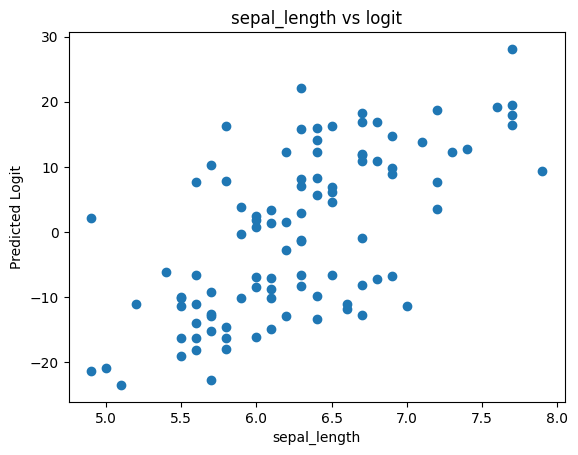

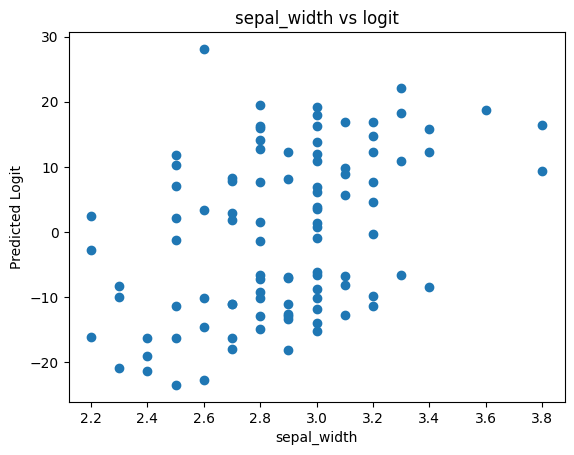

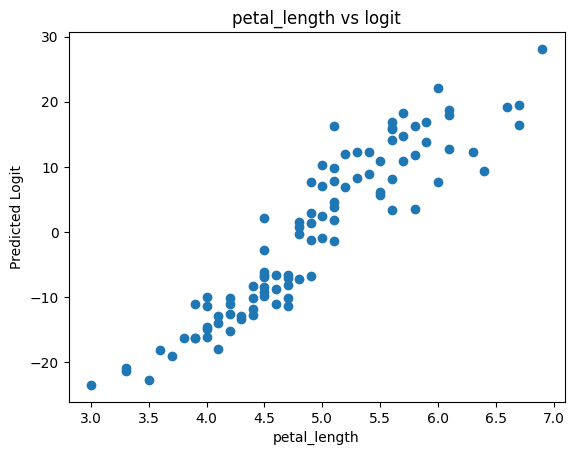

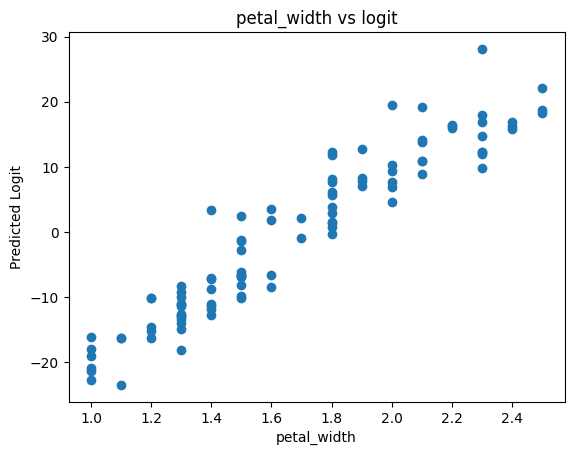

In [56]:
# Cek asumsi regresi logistik
# Linearity Logit

df['logit_hat'] = model.predict(X_constant, linear=True)

for col in X_constant.columns:
    if col == 'const':
        continue
    plt.scatter(df[col],df['logit_hat'])
    plt.xlabel(col)
    plt.ylabel('Predicted Logit')
    plt.title(col+ " vs logit")
    plt.show()

# Terlihat sepal length dan sepal width tidak berbentuk pola linear maka perlu transformasi -> logit/poly/spline, dst

In [62]:
# Cek mulikolinearitas (VIF)

vif = pd.DataFrame()
vif['fitur'] = X_constant.columns
vif['VIF'] = [variance_inflation_factor(X_constant.values, i)
              for i in range (X_constant.shape[1])]

print(vif)

# jika VIF > 5 maka ada masalah multikolinearitas
# terlihat di sini yang bermasalah adalah petal length

          fitur         VIF
0         const  132.965172
1  sepal_length    3.886195
2   sepal_width    1.655406
3  petal_length    7.077517
4   petal_width    3.840411


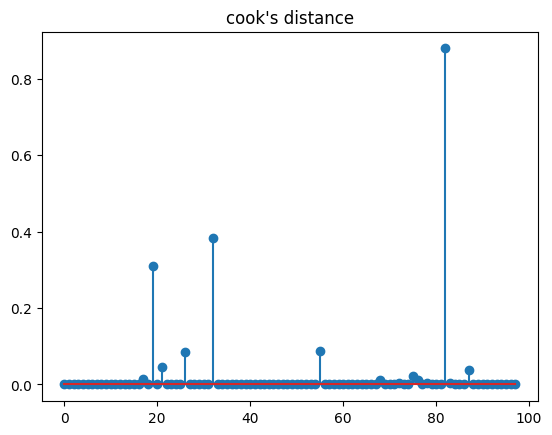

In [64]:
# cek poin influensial (Cook's distance)

influens = model.get_influence()
cooks = influens.cooks_distance[0]

plt.stem(cooks)
plt.title("cook's distance")
plt.show()

In [68]:
# Cek goodness of fit metode likelihood ratio

print(model.llr_pvalue)

if model.llr_pvalue > 0.05:
    print("model tidak signifikan secara overall")
else:
    print("model signifikan secara overall")

7.617779815152409e-26
model signifikan secara overall


In [70]:
# cek goodness of fit metode McFadden R2 (Pseudo R2)
print(model.prsquared)

# jika nilai > 0,4 maka model sangat baik

0.9124241952245911


STATISTICAL LEARNING

In [73]:
# Ambil data yang diperlukan

df =  pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\iris.csv")
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [75]:
# Split datanya 

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [78]:
# Gunakan pipeline agar data tidak bocor

numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline([
    ('le', LabelEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logit', LogisticRegression(
        class_weight='balanced',
        multi_class='multinomial',
        random_state=42
    ))
])

In [85]:
# Tuning dan fitting modelnya

param_grid = {
    'logit__C' :[0.01, 1],
    'logit__solver':['liblinear', 'saga'],
    'logit__penalty': ['l1', 'l2'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random = RandomizedSearchCV(estimator=model,
param_distributions=param_grid,
scoring='accuracy',
cv=cv,
n_jobs=-1
)

random.fit(X_train, y_train)
print("Best Parameter:",random.best_params_)
print("Best Score:", random.best_score_)

C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameter: {'logit__solver': 'saga', 'logit__penalty': 'l1', 'logit__C': 1}
Best Score: 0.9714285714285713


C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Robyi\AppDat

In [88]:
# Prediksi data latihnya

# Prediksi
y_pred = random.predict(X_test)
y_prob = random.predict_proba(X_test)[:, 1]

In [99]:
# Cek probabilitas data test dalam menebak kelas

y_proba = random.predict_proba(X_test)
print(y_proba)

[[5.86566700e-04 2.93101498e-01 7.06311935e-01]
 [2.30235080e-02 7.63702980e-01 2.13273512e-01]
 [1.02430161e-02 6.69372329e-01 3.20384655e-01]
 [1.21540227e-02 5.78073586e-01 4.09772391e-01]
 [3.97256331e-03 3.47504099e-01 6.48523338e-01]
 [4.54670550e-05 2.80234735e-02 9.71931059e-01]
 [6.95504276e-02 8.06105686e-01 1.24343886e-01]
 [1.16781347e-01 8.33484647e-01 4.97340052e-02]
 [9.16383350e-01 8.35661982e-02 5.04516809e-05]
 [1.73431141e-04 4.79079232e-02 9.51918646e-01]
 [9.53318900e-01 4.66553902e-02 2.57098405e-05]
 [9.47455866e-01 5.25146624e-02 2.94718652e-05]
 [1.16411621e-03 3.12181483e-01 6.86654401e-01]
 [1.75438970e-03 3.23864221e-01 6.74381389e-01]
 [9.40902088e-01 5.90641540e-02 3.37582962e-05]
 [1.13318664e-04 4.54732095e-02 9.54413472e-01]
 [2.55155938e-01 7.20654261e-01 2.41898010e-02]
 [9.33588150e-01 6.63732147e-02 3.86348182e-05]
 [8.64337179e-01 1.35332400e-01 3.30420879e-04]
 [9.01468194e-01 9.84371221e-02 9.46841906e-05]
 [4.85898273e-02 8.18109497e-01 1.333006

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Text(113.9222222222222, 0.5, 'true value')

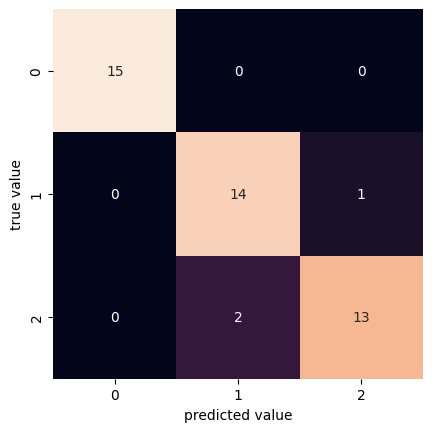

In [94]:
# Cek akurasi skor

# Evaluasi
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square  =True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

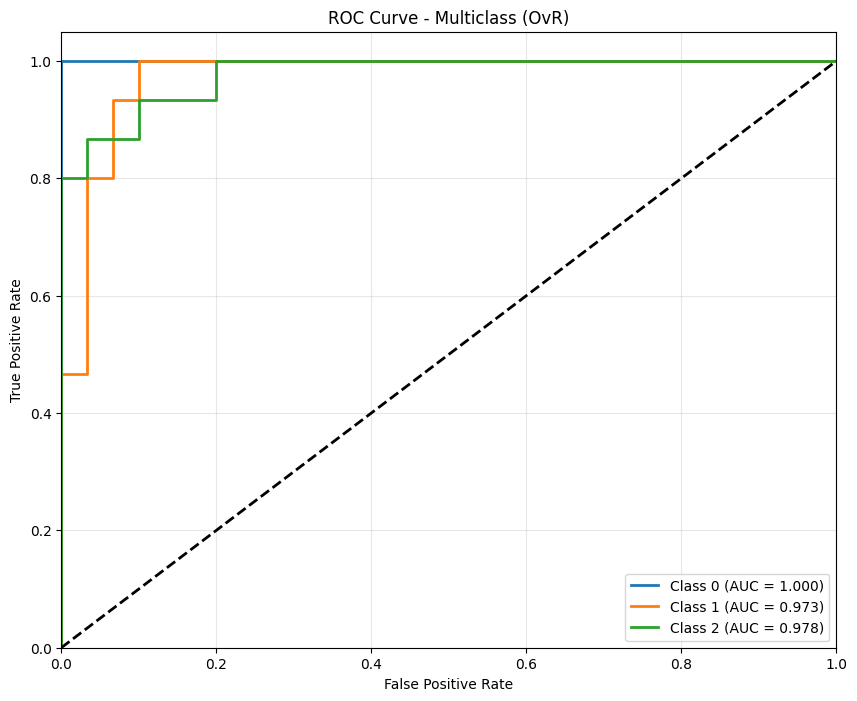

In [120]:
# Visualisasi roc auc

from sklearn.preprocessing import label_binarize

# Binarize labels
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Plot ROC curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass (OvR)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [101]:
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.85714286 0.95238095 0.95238095 1.         0.95238095]
Mean CV Accuracy: 0.9428571428571428


Neural Network (Deep Learning)

In [11]:
# Ambil data yang diperlukan

df =  pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\iris.csv")
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [13]:
# Split Datanya

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# Preprocessing

MinMax = MinMaxScaler()
X_train_scaled = MinMax.fit_transform(X_train)
X_test_scaled = MinMax.fit_transform(X_test)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [15]:
# Pindah ke data tensor agar performa tinggi

X_train_tf = tf.convert_to_tensor(X_train_scaled, dtype= tf.float32)
X_test_tf = tf.convert_to_tensor(X_test_scaled, dtype= tf.float32)

y_train_tf = tf.convert_to_tensor(y_train_enc, dtype= tf.int32)
y_test_tf = tf.convert_to_tensor(y_test_enc, dtype= tf.int32)

In [16]:
# Bangun model neural networks atau deep learningnya berbasis hyperparameters

def build_model(hp):
    model = keras.Sequential()
    l1_val = hp.Float("l1", 1e-5, 1e-3, sampling='log')
    l2_val = hp.Float("l2", 1e-5, 1e-3, sampling='log')
    units = hp.Int("units", min_value=16, max_value=64, step=16)
    model.add(keras.layers.Dense(units, 
                                 activation='relu',
                                 input_shape=(X_train_tf.shape[1],),
                                 kernel_regularizer=regularizers.l1_l2(l1=l1_val, l2=l2_val)))
    model.add(keras.layers.Dropout(hp.Float("dropout",0.0,0.3,step=0.15)))
    model.add(keras.layers.Dense(3, activation='softmax'))
    lrate = hp.Float("lrate",min_value=1e-3,max_value=1e-2,step=1e-3)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lrate),
                  loss=keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])
    return model

In [17]:
# Lakukan tuning

tuner = kt.Hyperband(build_model,
                     objective=kt.Objective('val_accuracy', direction='max'),
                     directory='tunerdir',
                     project_name='tabularnn',
                     overwrite=True,
                     max_epochs=50, # Tambah epoch agar akurasi tinggi
                     factor=3
                    )

# Search dengan early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

tuner.search(
    X_train_tf, y_train_tf,
    validation_split=0.2,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

best_model = tuner.get_best_models(1)[0]

Trial 90 Complete [00h 00m 12s]
val_accuracy: 0.9523809552192688

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 07m 16s


In [18]:
# Cek hyperparameters terbaik

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n=== Best Hyperparameters ===")
print(f"Units: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Learning rate: {best_hps.get('lrate'):.5f}")


=== Best Hyperparameters ===
Units: 64
Dropout: 0.3
Learning rate: 0.00900


In [19]:
# Cek akurasi

loss, acc = best_model.evaluate(X_test_tf, y_test_tf)
print("Loss:",loss)
print("Accuracy:" ,acc)

2/2 [==============================] - 1s 23ms/step - loss: 0.4016 - accuracy: 0.9778
Loss: 0.40156182646751404
Accuracy: 0.9777777791023254


In [20]:
# Cek ringkasan model terbaik

best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Visualisasi loss dan akurasi

# Train model dengan menyimpan history
history = best_model.fit(
    X_train_tf, y_train_tf,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Model Loss During Training', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(alpha=0.3)
# Plot Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_title('Model Accuracy During Training', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(alpha=0.3)
plt.tight_layout()

In [ ]:
plt.show()

Epoch 1/100
6/6 [==============================] - 2s 72ms/step - loss: 1.0562 - accuracy: 0.5833 - val_loss: 0.9598 - val_accuracy: 0.5714
Epoch 2/100
6/6 [==============================] - 0s 22ms/step - loss: 0.8933 - accuracy: 0.6786 - val_loss: 0.8698 - val_accuracy: 0.5714
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 0.7636 - accuracy: 0.6905 - val_loss: 0.7217 - val_accuracy: 0.5714
Epoch 4/100
6/6 [==============================] - 0s 21ms/step - loss: 0.6629 - accuracy: 0.6905 - val_loss: 0.6129 - val_accuracy: 0.6190
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 0.5941 - accuracy: 0.7738 - val_loss: 0.5518 - val_accuracy: 0.6190
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.5122 - accuracy: 0.7976 - val_loss: 0.5038 - val_accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 0s 22ms/step - loss: 0.4776 - accuracy: 0.8452 - val_loss: 0.4609 - val_accuracy: 0.8571
Epoch 8/100
6/6 [===

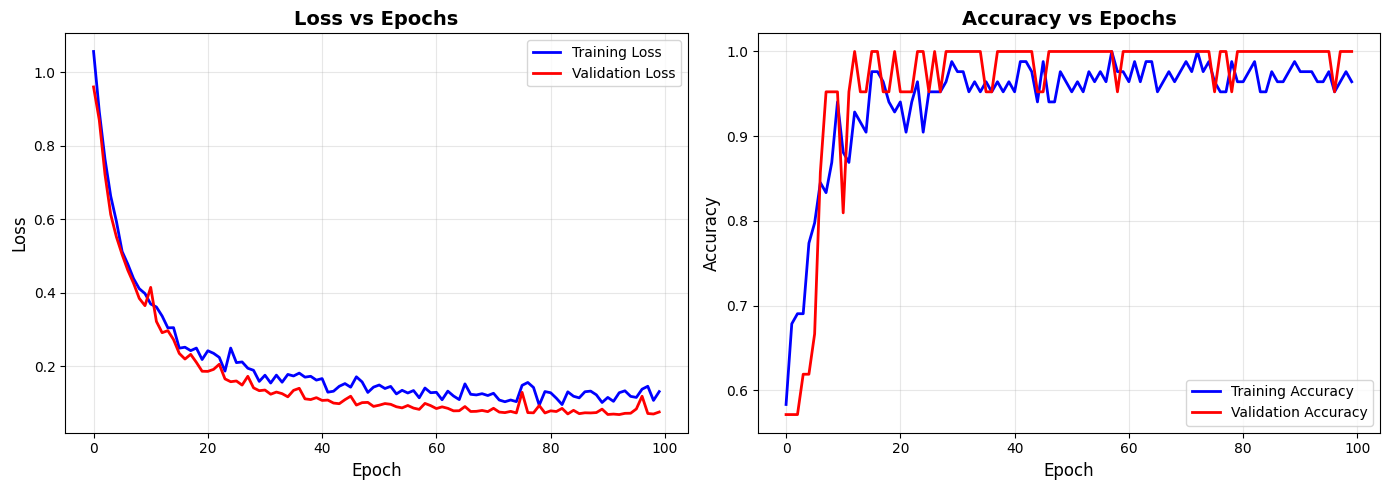

In [22]:
# Ambil best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Rebuild model dengan best hyperparameters
final_model = build_model(best_hps)

# Train ulang dengan early stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = final_model.fit(
    X_train_tf, y_train_tf,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Plot
plt.figure(figsize=(14, 5))
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
plt.title('Loss vs Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
plt.title('Accuracy vs Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

157/157 [==============================] - 1s 4ms/step


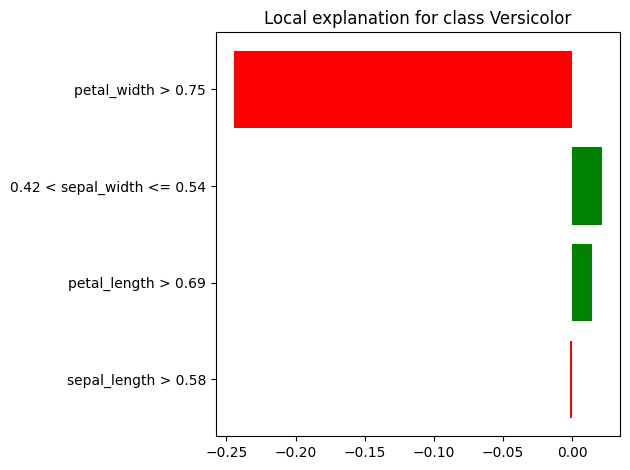

In [23]:
# Explainer agar model AI bisa dijelaskan

# Buat LIME explainer
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
class_names = ['Setosa', 'Versicolor', 'Virginica']

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Explain satu prediksi
i = 5  # Sample index
exp = explainer.explain_instance(
    X_test_scaled[i], 
    final_model.predict,
    num_features=4
)

# Visualisasi
exp.show_in_notebook(show_table=True)

# Atau plot
exp.as_pyplot_figure()
plt.tight_layout()
plt.show()

2/2 [==============================] - 0s 13ms/step


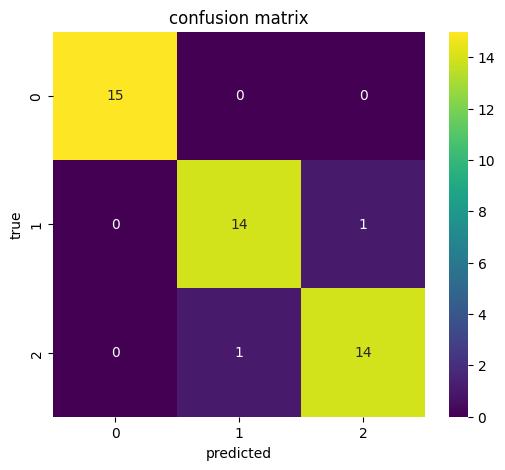

In [28]:
# Cek confusion matrix

y_pred_proba = best_model.predict(X_test_tf)
y_pred_class = np.argmax(y_pred_proba, axis=1)

cm = confusion_matrix(y_test_tf, y_pred_class)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=["0","1","2"],
            yticklabels=["0","1","2"])
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("confusion matrix")
plt.show()

2/2 [==============================] - 0s 8ms/step
ROC-AUC(OVR): 0.9955555555555556


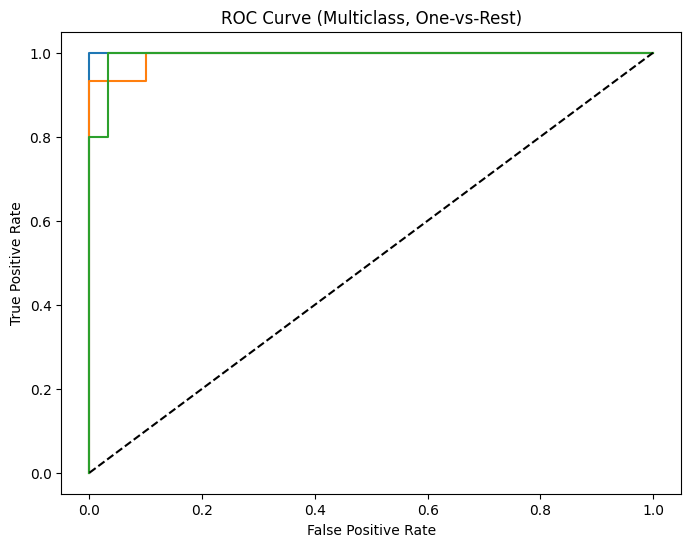

In [27]:
# Cek ROC AUC

y_test_tfbin = label_binarize(y_test_tf, classes=[0,1,2])

roc_auc = roc_auc_score(y_test_tfbin, y_pred_proba, multi_class='ovr')
print("ROC-AUC(OVR):", roc_auc)

plt.figure(figsize=(8,6))
for i in range(3):
    fpr,tpr,_=roc_curve(y_test_tfbin[:,i], y_pred_proba[:,i])
    plt.plot(fpr,tpr,label=f"Class{i} (AUC = {auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass, One-vs-Rest)")
plt.show()